In [44]:
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv("retail_dataset.csv")
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Monthly_Sales            105 non-null    float64
 1   Customer_Feedback_Score  105 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [45]:
#Get the statistical summary of the numerical column

#Adjust the display setting for float value
pd.options.display.float_format = '{:,.2f}'.format
data.describe()

,Monthly_Sales,Customer_Feedback_Score
count,105.00,105.00
mean,"5,185.65",3.29
std,"1,155.88",1.77
min,"3,690.13",1.02
25%,"4,718.86",1.98
50%,"4,982.09",3.19
75%,"5,305.84",3.91
max,"9,983.87",9.94


In [46]:
#find the mean on Monthly sales
data['Monthly_Sales'].mean()


5185.651854991164

In [47]:
#Find ht Q1 Q3 percentile
np.percentile(data['Monthly_Sales'],[25,75])

array([4718.85623538, 5305.83814442])

In [48]:
#Function to get outlier
def outlierDetection(column):
  #1. Sort the data in ascending order
  sorted(column)
  #2. Calc Q1 and Q3
  Q1,Q3 = np.percentile(column, [25,75])

  #3.Calc IQR
  IQR = Q3 - Q1

  #4. Calc valid range
  lowerRange = Q1 - (1.5 * IQR)
  upperRange = Q3 + (1.5 * IQR)

  return lowerRange,upperRange

In [49]:
lr , ur = outlierDetection(data['Monthly_Sales'])
print(lr,ur)

3838.3833718181318 6186.311007981816


In [50]:
# Get Outliers for Montly Sales column
processedMonthlySales = data[ (data['Monthly_Sales'] >lr) & (data['Monthly_Sales'] < ur)]
processedMonthlySales


,Monthly_Sales,Customer_Feedback_Score
0,"5,248.36",3.08
1,"4,930.87",3.81
2,"5,323.84",2.45
3,"5,761.51",4.89
4,"4,882.92",4.85
...,...,...
95,"4,268.24",3.01
96,"5,148.06",3.31
97,"5,130.53",2.97
98,"5,002.56",1.78


In [42]:
#find the mean on Customer_Feedback_Score
processedMonthlySales['Customer_Feedback_Score'].mean()

#Find ht Q1 Q3 percentile
np.percentile(data['Customer_Feedback_Score'],[25,75])

lr , ur = outlierDetection(data['Customer_Feedback_Score'])
print(lr,ur)

# Get Outliers for Customer feedback
processCustomerScore = processedMonthlySales[ (processedMonthlySales['Customer_Feedback_Score'] >lr) & (processedMonthlySales['Customer_Feedback_Score'] < ur)]
processCustomerScore

-0.9294016578803217 6.818225625844095


,Monthly_Sales,Customer_Feedback_Score
0,"5,248.36",3.08
1,"4,930.87",3.81
2,"5,323.84",2.45
3,"5,761.51",4.89
4,"4,882.92",4.85
...,...,...
95,"4,268.24",3.01
96,"5,148.06",3.31
97,"5,130.53",2.97
98,"5,002.56",1.78


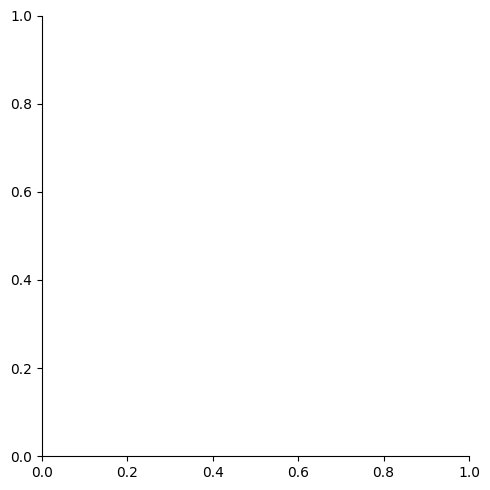